In [61]:
import pandas as pd

In [62]:
data = pd.read_csv('training_set_VU_DM_2014.csv')
data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [31]:
sampled = data.groupby(by='srch_id', as_index=False)
sampled.head()
#data.info()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
28,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,3625,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
29,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11622,4,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
30,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,11826,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
31,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,22824,3,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
32,4,2012-12-31 08:59:22,5,219,NaN,NaN,219,37581,5,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [63]:
selected_names = np.random.choice(data.srch_id.unique(),5000,replace = False)
#grouped = data[data.srch_id.isin(selected_names)].groupby('srch_id')
grouped = data[data.srch_id.isin(selected_names)]
grouped.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
1714,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,5507,3,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1715,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,6595,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1716,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,27980,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,107.42,1
1717,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,29029,2,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1718,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,31430,2,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [64]:
#grouped.apply(pd.DataFrame.info)
grouped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123943 entries, 1714 to 4957668
Data columns (total 54 columns):
srch_id                        123943 non-null int64
date_time                      123943 non-null object
site_id                        123943 non-null int64
visitor_location_country_id    123943 non-null int64
visitor_hist_starrating        6858 non-null float64
visitor_hist_adr_usd           6887 non-null float64
prop_country_id                123943 non-null int64
prop_id                        123943 non-null int64
prop_starrating                123943 non-null int64
prop_review_score              123748 non-null float64
prop_brand_bool                123943 non-null int64
prop_location_score1           123943 non-null float64
prop_location_score2           97418 non-null float64
prop_log_historical_price      123943 non-null float64
position                       123943 non-null int64
price_usd                      123943 non-null float64
promotion_flag             

In [65]:
grouped.to_csv('5000users')

In [66]:
data = pd.read_csv('5000users')
data.head()

,Unnamed: 0,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1714,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,5507,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,1715,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,6595,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,1716,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,27980,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,107.42,1
3,1717,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,29029,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,1718,115,2013-03-28 18:08:52,5,219,NaN,NaN,219,31430,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [4]:
data.describe()

,Unnamed: 0,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.930600e+04,49306.000000,49306.000000,49306.000000,2199.000000,2199.000000,49306.000000,49306.000000,49306.000000,49236.000000,...,892.000000,3482.000000,3920.000000,1472.000000,19541.000000,20279.000000,6374.000000,49306.000000,1379.000000,49306.000000
mean,2.485125e+06,166761.495842,9.921673,174.245143,3.382860,174.283165,174.478867,70382.589299,3.170162,3.756337,...,18.172646,0.140437,0.085459,20.834918,-0.061000,0.012377,57.661908,0.043889,395.078223,0.027968
std,1.458227e+06,97915.593258,7.594819,67.239469,0.688888,95.361538,68.215268,40664.890498,1.040410,1.073469,...,36.395098,0.560688,0.319627,59.021934,0.476215,0.206881,2453.446808,0.204851,562.800305,0.164883
min,3.300000e+03,229.000000,1.000000,2.000000,2.000000,13.200000,2.000000,1.000000,0.000000,0.000000,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000,-1.000000,2.000000,0.000000,7.330000,0.000000
25%,1.183332e+06,79102.000000,5.000000,100.000000,2.910000,108.310000,103.000000,35268.250000,3.000000,3.500000,...,6.000000,0.000000,0.000000,7.000000,0.000000,0.000000,7.000000,0.000000,124.920000,0.000000
50%,2.502704e+06,168078.000000,5.000000,219.000000,3.400000,144.280000,219.000000,70247.500000,3.000000,4.000000,...,11.000000,0.000000,0.000000,12.000000,0.000000,0.000000,11.000000,0.000000,223.020000,0.000000
75%,3.784290e+06,254163.000000,14.000000,219.000000,3.780000,207.300000,219.000000,105550.500000,4.000000,4.500000,...,19.000000,0.000000,0.000000,21.000000,0.000000,0.000000,17.000000,0.000000,448.540000,0.000000
max,4.958006e+06,332751.000000,34.000000,230.000000,5.000000,599.950000,229.000000,140816.000000,5.000000,5.000000,...,672.000000,1.000000,1.000000,1461.000000,1.000000,1.000000,148825.000000,1.000000,8610.730000,1.000000


In [6]:
#sample = data.sample(n=10000)

In [7]:
#sample.head()

In [8]:
#sample.describe()

In [67]:
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

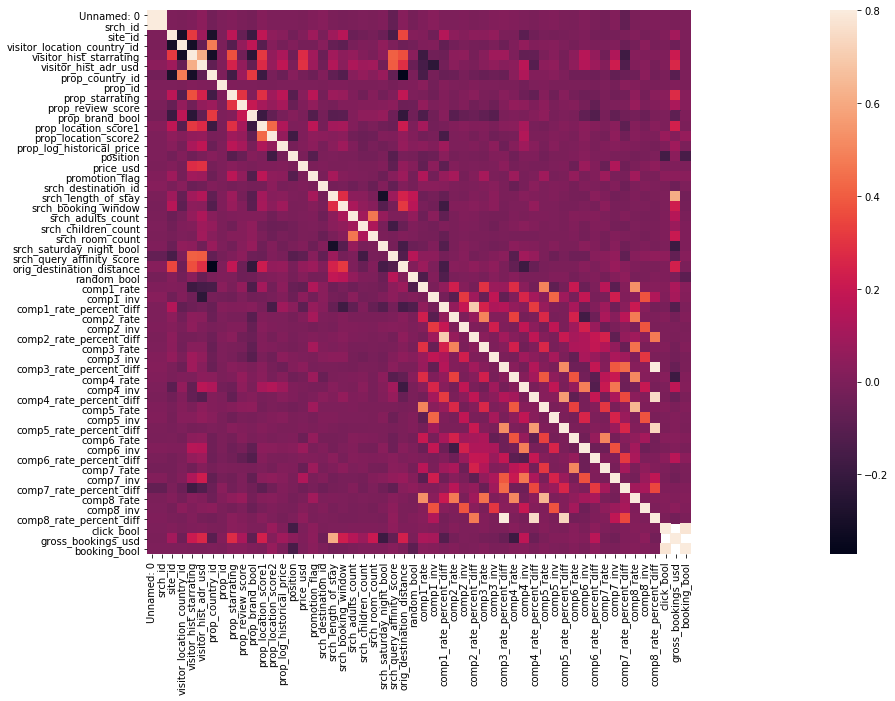

In [68]:
#add prog and money
corrmat = data.corr()
f, ax = plt.subplots(figsize=(50, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

In [87]:
history_data = data.loc[data['visitor_hist_adr_usd'].notnull()]
history_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6887 entries, 127 to 123312
Data columns (total 55 columns):
Unnamed: 0                     6887 non-null int64
srch_id                        6887 non-null int64
date_time                      6887 non-null object
site_id                        6887 non-null int64
visitor_location_country_id    6887 non-null int64
visitor_hist_starrating        6858 non-null float64
visitor_hist_adr_usd           6887 non-null float64
prop_country_id                6887 non-null int64
prop_id                        6887 non-null int64
prop_starrating                6887 non-null int64
prop_review_score              6875 non-null float64
prop_brand_bool                6887 non-null int64
prop_location_score1           6887 non-null float64
prop_location_score2           5445 non-null float64
prop_log_historical_price      6887 non-null float64
position                       6887 non-null int64
price_usd                      6887 non-null float64
promoti

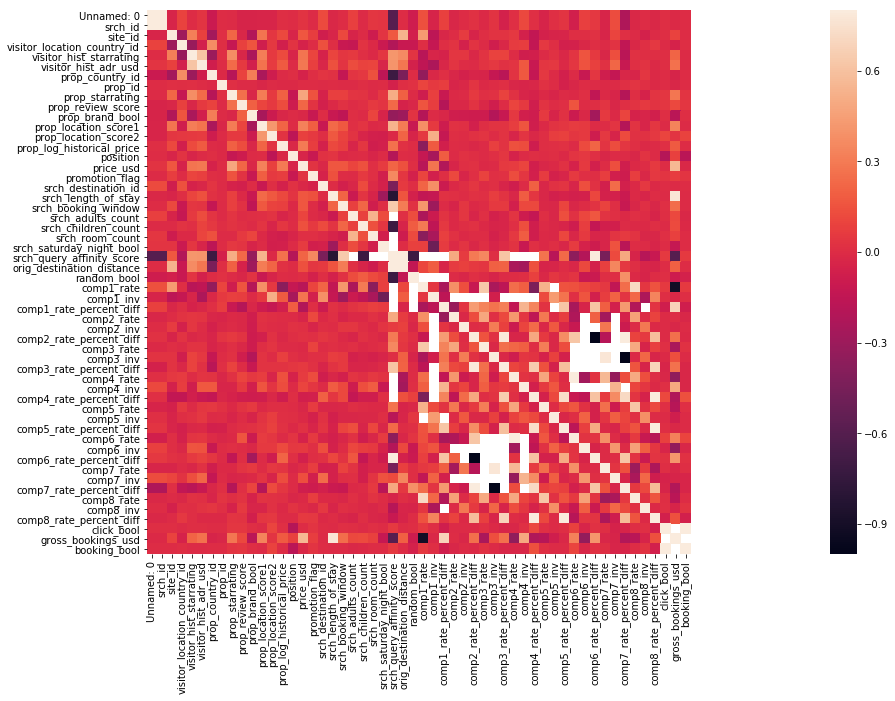

In [70]:
#add prog and money
corrmat = history_data.corr()
f, ax = plt.subplots(figsize=(50, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

In [76]:
#sample.to_csv('sampled')

clicked_data = history_data[history_data['click_bool'] == 1]
clicked_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 304 entries, 144 to 123312
Data columns (total 55 columns):
Unnamed: 0                     304 non-null int64
srch_id                        304 non-null int64
date_time                      304 non-null object
site_id                        304 non-null int64
visitor_location_country_id    304 non-null int64
visitor_hist_starrating        303 non-null float64
visitor_hist_adr_usd           304 non-null float64
prop_country_id                304 non-null int64
prop_id                        304 non-null int64
prop_starrating                304 non-null int64
prop_review_score              304 non-null float64
prop_brand_bool                304 non-null int64
prop_location_score1           304 non-null float64
prop_location_score2           275 non-null float64
prop_log_historical_price      304 non-null float64
position                       304 non-null int64
price_usd                      304 non-null float64
promotion_flag           

In [98]:
booked_data = history_data[history_data['booking_bool'] == 1]
booked_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 144 to 123312
Data columns (total 55 columns):
Unnamed: 0                     243 non-null int64
srch_id                        243 non-null int64
date_time                      243 non-null object
site_id                        243 non-null int64
visitor_location_country_id    243 non-null int64
visitor_hist_starrating        242 non-null float64
visitor_hist_adr_usd           243 non-null float64
prop_country_id                243 non-null int64
prop_id                        243 non-null int64
prop_starrating                243 non-null int64
prop_review_score              243 non-null float64
prop_brand_bool                243 non-null int64
prop_location_score1           243 non-null float64
prop_location_score2           222 non-null float64
prop_log_historical_price      243 non-null float64
position                       243 non-null int64
price_usd                      243 non-null float64
promotion_flag           

In [99]:
#sample.to_csv('sampled')

labels = range(1, 40)
#a = history_data.groupby('srch_id').apply(lambda x:  x['price_usd'].mean())
#a = clicked_data.groupby('srch_id').apply(lambda x:  x['price_usd'].mean())
a = booked_data.groupby('srch_id').apply(lambda x:  x['price_usd'].mean())


a.head()

srch_id
766      46.30
1596    188.92
2145     89.00
2383     99.00
4962     96.00
dtype: float64

In [100]:
#b = history_data.groupby('srch_id').apply(lambda x : x['visitor_hist_adr_usd'].mean())
#b = clicked_data.groupby('srch_id').apply(lambda x : x['visitor_hist_adr_usd'].mean())

b = booked_data.groupby('srch_id').apply(lambda x : x['visitor_hist_adr_usd'].mean())
len(b)

243

In [101]:
delta = abs(a - b)
#combined['delta'] = combined.apply(lambda x : x['hist'].astype(float) - x['mean'].astype(float))
len(delta)

243

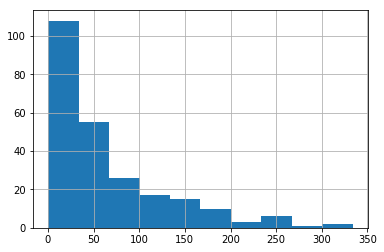

In [103]:
#booked price delta
delta.std()
delta.hist()

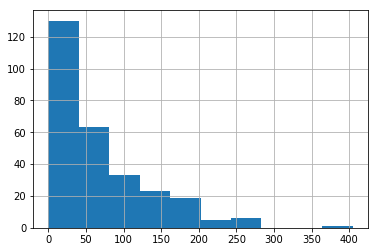

In [92]:
#overall price delta
delta.std()
deltahist()

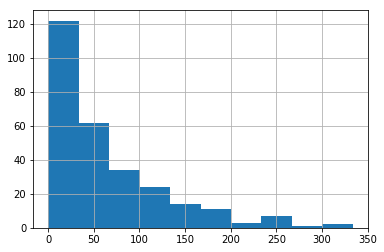

In [97]:
#clicked price delta
delta.std()
delta.hist()

In [29]:
print(historical)

In [34]:
searches = data.srch_id.value_counts()
len(searches)

2000

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49306 entries, 0 to 49305
Data columns (total 55 columns):
Unnamed: 0                     49306 non-null int64
srch_id                        49306 non-null int64
date_time                      49306 non-null object
site_id                        49306 non-null int64
visitor_location_country_id    49306 non-null int64
visitor_hist_starrating        2199 non-null float64
visitor_hist_adr_usd           2199 non-null float64
prop_country_id                49306 non-null int64
prop_id                        49306 non-null int64
prop_starrating                49306 non-null int64
prop_review_score              49236 non-null float64
prop_brand_bool                49306 non-null int64
prop_location_score1           49306 non-null float64
prop_location_score2           37966 non-null float64
prop_log_historical_price      49306 non-null float64
position                       49306 non-null int64
price_usd                      49306 non-null fl

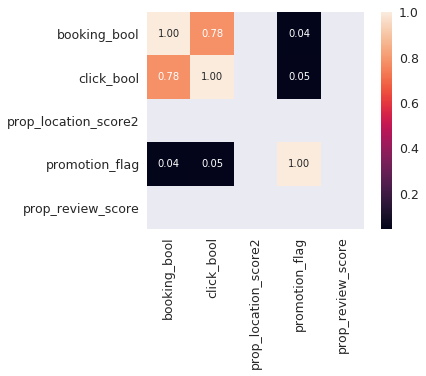

In [9]:
k = 5 #number of variables for heatmap
cols = corrmat.nlargest(k, 'booking_bool')['booking_bool'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

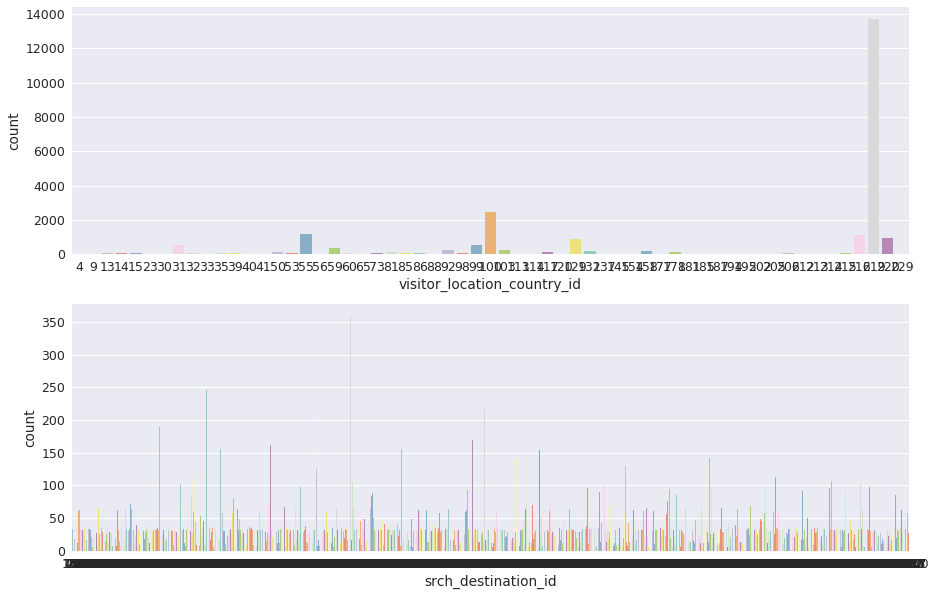

In [10]:
# Plot 

fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,10))

bookings_df = data[data["booking_bool"] == 1]

# What are the most countries the customer travel from?
sns.countplot('visitor_location_country_id',data=data.sort_values(by=['visitor_location_country_id']),ax=axis1,palette="Set3")

# What are the most countries the customer travel to?
sns.countplot('srch_destination_id',data=data.sort_values(by=['srch_destination_id']),ax=axis2,palette="Set3")

# Combine both plots
# fig, (axis1) = plt.subplots(1,1,figsize=(15,5))

# sns.distplot(bookings_df["hotel_country"], kde=False, rug=False, bins=25, ax=axis1)
# sns.distplot(bookings_df["user_location_country"], kde=False, rug=False, bins=25, ax=axis1)

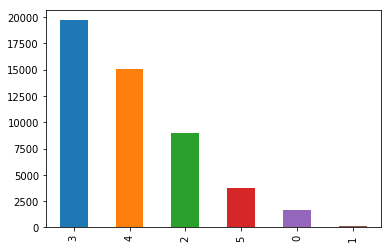

In [36]:
import pandas as pd
from matplotlib.pyplot import pie, axis, show
data.prop_starrating.value_counts().plot.bar();

In [37]:
import matplotlib.pyplot as plt
count_book = data.groupby(['booking_bool'], sort=False).size().reset_index(name='Count')
count_book
 


,booking_bool,Count
0,0,47927
1,1,1379


In [38]:
import matplotlib.pyplot as plt
count_brand = data.groupby(['prop_brand_bool'], sort=False).size().reset_index(name='Count')
count_brand
 

,prop_brand_bool,Count
0,1,31275
1,0,18031


In [39]:
import matplotlib.pyplot as plt
count_click = data.groupby(['click_bool'], sort=False).size().reset_index(name='Count')
count_click
 

,click_bool,Count
0,0,47142
1,1,2164


In [47]:
filtered3 = data.loc[(data['booking_bool'] == 1) & data['promotion_flag'] == 1]
filtered3.count()

Unnamed: 0                     423
srch_id                        423
date_time                      423
site_id                        423
visitor_location_country_id    423
visitor_hist_starrating         25
visitor_hist_adr_usd            25
prop_country_id                423
prop_id                        423
prop_starrating                423
prop_review_score              423
prop_brand_bool                423
prop_location_score1           423
prop_location_score2           390
prop_log_historical_price      423
position                       423
price_usd                      423
promotion_flag                 423
srch_destination_id            423
srch_length_of_stay            423
srch_booking_window            423
srch_adults_count              423
srch_children_count            423
srch_room_count                423
srch_saturday_night_bool       423
srch_query_affinity_score       38
orig_destination_distance      263
random_bool                    423
comp1_rate          

In [41]:
filtered = data.loc[(data['booking_bool'] == 1) & data['prop_brand_bool'] == 1]
filtered.count()

Unnamed: 0                     929
srch_id                        929
date_time                      929
site_id                        929
visitor_location_country_id    929
visitor_hist_starrating         62
visitor_hist_adr_usd            62
prop_country_id                929
prop_id                        929
prop_starrating                929
prop_review_score              928
prop_brand_bool                929
prop_location_score1           929
prop_location_score2           848
prop_log_historical_price      929
position                       929
price_usd                      929
promotion_flag                 929
srch_destination_id            929
srch_length_of_stay            929
srch_booking_window            929
srch_adults_count              929
srch_children_count            929
srch_room_count                929
srch_saturday_night_bool       929
srch_query_affinity_score       73
orig_destination_distance      663
random_bool                    929
comp1_rate          

In [43]:
filtered2 = data.loc[(data['click_bool'] == 1) & data['prop_brand_bool'] == 1]
filtered2.count()

Unnamed: 0                     1394
srch_id                        1394
date_time                      1394
site_id                        1394
visitor_location_country_id    1394
visitor_hist_starrating          66
visitor_hist_adr_usd             66
prop_country_id                1394
prop_id                        1394
prop_starrating                1394
prop_review_score              1392
prop_brand_bool                1394
prop_location_score1           1394
prop_location_score2           1253
prop_log_historical_price      1394
position                       1394
price_usd                      1394
promotion_flag                 1394
srch_destination_id            1394
srch_length_of_stay            1394
srch_booking_window            1394
srch_adults_count              1394
srch_children_count            1394
srch_room_count                1394
srch_saturday_night_bool       1394
srch_query_affinity_score        95
orig_destination_distance      1012
random_bool                 

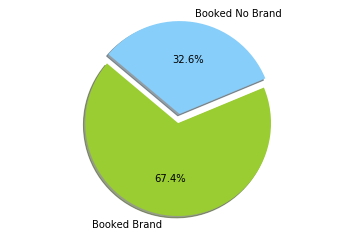

In [42]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Booked Brand', 'Booked No Brand'
sizes = [929, 450]
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

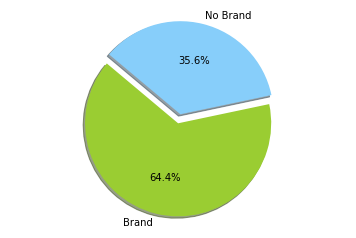

In [44]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Brand', 'No Brand'
sizes = [1394, 770]
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [45]:
tot_promo = data.loc[data['promotion_flag'] == 1]
tot_promo.count()

Unnamed: 0                     10289
srch_id                        10289
date_time                      10289
site_id                        10289
visitor_location_country_id    10289
visitor_hist_starrating          476
visitor_hist_adr_usd             476
prop_country_id                10289
prop_id                        10289
prop_starrating                10289
prop_review_score              10280
prop_brand_bool                10289
prop_location_score1           10289
prop_location_score2            8762
prop_log_historical_price      10289
position                       10289
price_usd                      10289
promotion_flag                 10289
srch_destination_id            10289
srch_length_of_stay            10289
srch_booking_window            10289
srch_adults_count              10289
srch_children_count            10289
srch_room_count                10289
srch_saturday_night_bool       10289
srch_query_affinity_score        637
orig_destination_distance       6671
r

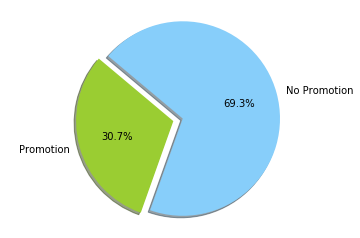

In [48]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Promotion', 'No Promotion'
sizes = [423, 956]
colors = ['yellowgreen', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

 
plt.axis('equal')
plt.show()

In [18]:
grouped = data.groupby('srch_id')
grouped.head()

,Unnamed: 0,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,3060,195,2012-12-24 07:32:56,5,219,NaN,NaN,219,8660,3,...,NaN,NaN,NaN,NaN,-1.0,0.0,7.0,0,NaN,0
1,3061,195,2012-12-24 07:32:56,5,219,NaN,NaN,219,21997,3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,3062,195,2012-12-24 07:32:56,5,219,NaN,NaN,219,22900,3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,3063,195,2012-12-24 07:32:56,5,219,NaN,NaN,219,28285,4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
4,3064,195,2012-12-24 07:32:56,5,219,NaN,NaN,219,31144,3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
33,12131,867,2012-11-27 13:52:56,5,219,NaN,NaN,100,12167,2,...,NaN,NaN,NaN,NaN,0.0,0.0,5.0,0,NaN,0
34,12132,867,2012-11-27 13:52:56,5,219,NaN,NaN,100,12573,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
35,12133,867,2012-11-27 13:52:56,5,219,NaN,NaN,100,20618,2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,NaN,0
36,12134,867,2012-11-27 13:52:56,5,219,NaN,NaN,100,26756,2,...,NaN,NaN,NaN,NaN,1.0,0.0,21.0,0,NaN,0
37,12135,867,2012-11-27 13:52:56,5,219,NaN,NaN,100,28941,2,...,NaN,NaN,NaN,NaN,0.0,0.0,14.0,0,NaN,0


In [19]:
posdata = data.groupby('position')
print(posdata)

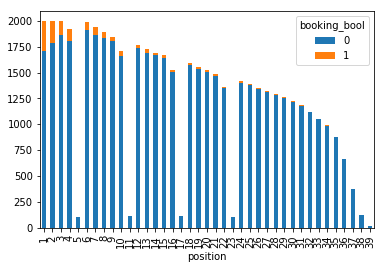

In [49]:
labels = range(1, 40)
data.groupby(['booking_bool', pd.cut(data['position'], 39, labels=labels)])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

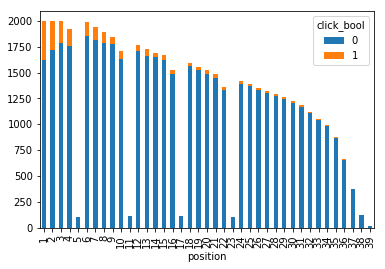

In [56]:
labels = range(1, 40)
data.groupby(['click_bool', pd.cut(data['position'], 39, labels=labels)])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

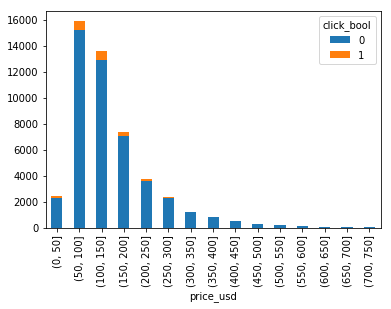

In [51]:
labels = range(1, 40)
data.groupby(['click_bool', pd.cut(data['price_usd'], np.arange(0, 800, 50))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)
    
    

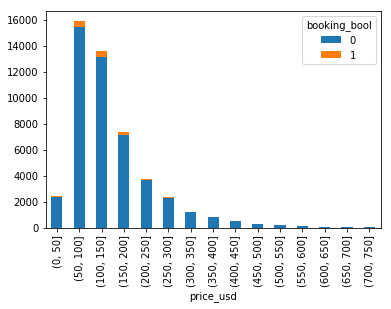

In [52]:
labels = range(1, 40)
data.groupby(['booking_bool', pd.cut(data['price_usd'], np.arange(0, 800, 50))])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

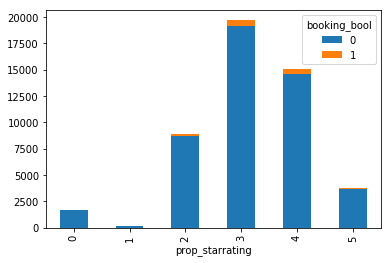

In [53]:
labels = range(0, 6)
data.groupby(['booking_bool', pd.cut(data['prop_starrating'], 6,labels=labels)])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

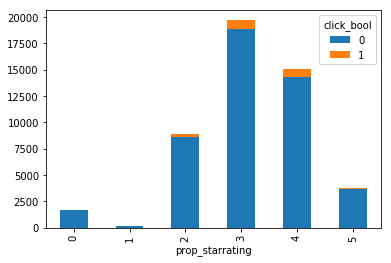

In [54]:
labels = range(0, 6)
data.groupby(['click_bool', pd.cut(data['prop_starrating'], 6,labels=labels)])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49306 entries, 0 to 49305
Data columns (total 55 columns):
Unnamed: 0                     49306 non-null int64
srch_id                        49306 non-null int64
date_time                      49306 non-null object
site_id                        49306 non-null int64
visitor_location_country_id    49306 non-null int64
visitor_hist_starrating        2199 non-null float64
visitor_hist_adr_usd           2199 non-null float64
prop_country_id                49306 non-null int64
prop_id                        49306 non-null int64
prop_starrating                49306 non-null int64
prop_review_score              49236 non-null float64
prop_brand_bool                49306 non-null int64
prop_location_score1           49306 non-null float64
prop_location_score2           37966 non-null float64
prop_log_historical_price      49306 non-null float64
position                       49306 non-null int64
price_usd                      49306 non-null fl

In [59]:
rand_results = data[data.random_bool == 1]
rand_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14655 entries, 150 to 49305
Data columns (total 55 columns):
Unnamed: 0                     14655 non-null int64
srch_id                        14655 non-null int64
date_time                      14655 non-null object
site_id                        14655 non-null int64
visitor_location_country_id    14655 non-null int64
visitor_hist_starrating        195 non-null float64
visitor_hist_adr_usd           195 non-null float64
prop_country_id                14655 non-null int64
prop_id                        14655 non-null int64
prop_starrating                14655 non-null int64
prop_review_score              14630 non-null float64
prop_brand_bool                14655 non-null int64
prop_location_score1           14655 non-null float64
prop_location_score2           11145 non-null float64
prop_log_historical_price      14655 non-null float64
position                       14655 non-null int64
price_usd                      14655 non-null fl

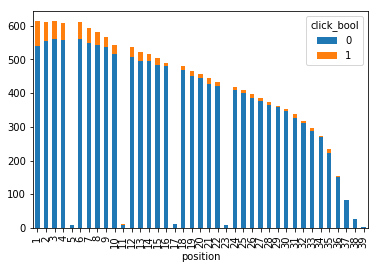

In [63]:
labels = range(1, 40)
rand_results.groupby(['click_bool', pd.cut(rand_results['position'], 39, labels=labels)])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)

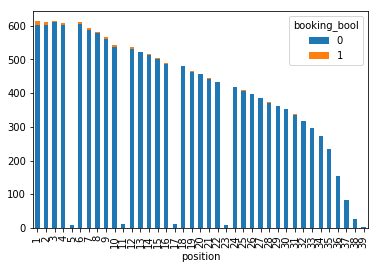

In [61]:
labels = range(1, 40)
rand_results.groupby(['booking_bool', pd.cut(rand_results['position'], 39, labels=labels)])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)